# Obligatory MNIST Example
## Setup

In [ ]:
# MNIST training code from https://keras.io/examples/vision/mnist_convnet/
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from skimage.transform import resize # extra import for resizing images
import matplotlib.pyplot as plt

In [1]:
# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

# Build + train the model 
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model.fit(x_train, y_train, batch_size=128, epochs=5, validation_split=0.1)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Train on 54000 samples, validate on 6000 samples
Epoch 1/5
54000/54000 [==============================] - 30s 547us/sample - loss: 0.3606 - accuracy: 0.8911 - val_loss: 0.0884 - val_accuracy: 0.9763
Epoch 2/5
54000/54000 [==============================] - 29s 541us/sample - loss: 0.1162 - accuracy: 0.9639 - val_loss: 0.0638 - val_accuracy: 0.9808
Epoch 3/5
54000/54000 [==============================] - 29s 533us/sample - loss: 0.0883 - accuracy: 0.9732 - val_loss: 0.0501 - val_accuracy: 0.9868
Epoch 4/5
54000/54000 [==============================] - 28s 516us/sample - loss: 0.0740 - accuracy: 0.9769 - val_loss: 0.0449 - val_accuracy: 0.9878
Epoch 5/5
54000/54000 [==============================] - 28s 516us/sample - loss: 0.0653 - accuracy: 0.9798 - val_loss: 0.0408 - val_accuracy: 0.9880


## Predict

In [63]:
img = resize(__c_2__, (28, 28))
preds = model.predict(img.reshape(1,28,28,1))[0]
print("Predicted:", np.argmax(preds))

Predicted: 8


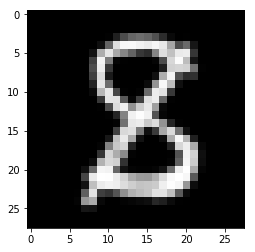

In [58]:
plt.imshow(img, cmap='gray')

In [69]:
nums = [__c_5__,__c_6__,__c_7__]
nums = [resize(n, (28,28,1)) for n in nums]
preds = model.predict([nums])
print([np.argmax(p) for p in preds])

[1, 2, 3]
